# Unveiling Insights: Data Analyst Jobs in the Philippines

## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the csv file

In [26]:
df = pd.read_csv('D:\Data Analysis\Python\data_analyst_jobs_data_2023-07-19.csv') # change this to where your csv file is located

## Delete Unnecessary Columns

In [27]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis = 1)
else:
    pass

let's check if there are job titles that are not data analyst roles

In [28]:
df['job_title'].unique()
# there are jobs that are not data analyst roles

array(['Research Analyst (Iloilo Site)', 'Business Analyst',
       'Marketing Data Analyst', ..., 'PROCESS EXCELLENCE LEAD',
       'FINANCE HEAD (BGC)', 'Internal Audit Specialist'], dtype=object)

## Lets examine what we are working with

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            3572 non-null   object 
 1   min_salary           668 non-null    float64
 2   max_salary           668 non-null    float64
 3   experience_required  2508 non-null   float64
 4   skills_required      1908 non-null   object 
 5   job_specializations  2422 non-null   object 
 6   career_level         3572 non-null   object 
 7   qualification        3572 non-null   object 
 8   job_type             3101 non-null   object 
 9   date_posted          3270 non-null   object 
 10  city                 1990 non-null   object 
 11  province             2123 non-null   object 
 12  region               3259 non-null   object 
dtypes: float64(3), object(10)
memory usage: 362.9+ KB


## Lets exclude other roles that are not data analyst roles

In [30]:
# Define the list of job title keywords related to data analysts
job_title_keywords = [
    'Data Analyst',
    'Analytics Analyst',
    'Business Analyst',
    'Data Science Analyst',
    'Reporting Analyst',
    'Data Insights Analyst',
    'Data and Insights Analyst',
    'Data Visualization Analyst',
    'Data Intelligence Analyst',
    'Data Operations Analyst',
    'Data Quality Analyst',
    'Marketing Analyst',
    'Financial Analyst',
    'Research Analyst',
    'Data'
]

# Filter out rows containing job titles unrelated to data analysts
df = df[df['job_title'].str.contains('|'.join(job_title_keywords), case=False)]

# Print the number of remaining rows after filtering
print(df.shape[0], 'Data Analyst related roles')

1912 Data Analyst related roles


### Excluding other Data professional roles

In [31]:
# Define a list of job titles that are excluded from the analysis, as they are not data analyst roles.
excluded_jobs = 'Data Engineer|Data Center Operator|Data Processing|Data Center Product Manager|Data Scientist|Database Admin|Data Architect|Data Migration|Data Protection|Data Science|Data Management|Database|Software Engineer|Data Encoder|Data entry|Data Controller|Data Processor|Finance Analyst'

# Filter out rows containing excluded job titles and create a new DataFrame.
data_analyst_df = df[~df['job_title'].str.contains(excluded_jobs, case=False)]

# Calculate the number of rows that contain other data-related professional roles.
num_other_data_roles = df[df['job_title'].str.contains(excluded_jobs, case=False)].shape[0]

# Calculate the number of remaining rows after excluding other data-related professional roles.
num_remaining_rows = data_analyst_df.shape[0]

# Print the number of rows containing other data-related professional roles.
print(num_other_data_roles, 'Rows contain other data professional roles')

# Print the number of remaining rows after filtering.
print(num_remaining_rows, '/', df.shape[0], 'Remaining Rows')

# Assign the filtered DataFrame back to 'df' to keep only the data analyst roles.
df = data_analyst_df


407 Rows contain other data professional roles
1505 / 1912 Remaining Rows


## Mean and Median Salary by Years of Experience
To gain insights into the salary trends based on years of experience, we first create a new column called 'mean_salary' by taking the average of the 'max_salary' and 'min_salary' values.

In [32]:
# summary statistics
df.describe()

,min_salary,max_salary,experience_required
count,249.000000,249.000000,1045.000000
mean,44748.915663,60348.072289,3.015311
std,23134.236883,32094.529686,1.732536
min,13000.000000,13000.000000,1.000000
25%,30000.000000,35000.000000,2.000000
50%,40000.000000,54000.000000,3.000000
75%,60000.000000,80000.000000,4.000000
max,144000.000000,175000.000000,12.000000


In [33]:
# Create a mean salary column
df['mean_salary'] = (df['max_salary'] + df['min_salary']) / 2

### First Let's see the distribution of salaries

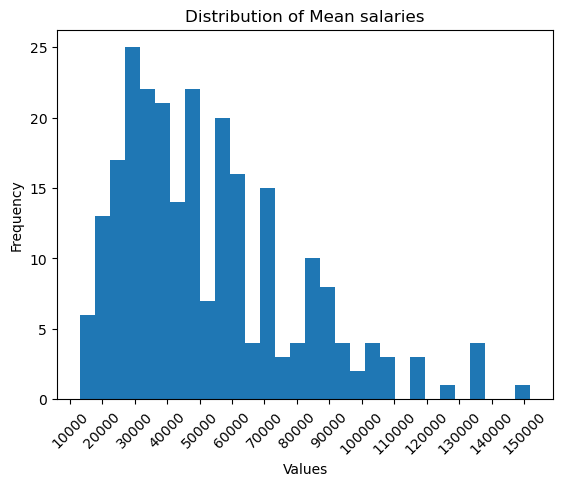

In [34]:
# Plotting histogram with increased x-axis labels
plt.hist(df['mean_salary'], bins=30)

# Adjusting x-axis tick frequency
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.locator_params(axis='x', nbins=30)  # Increase the number of x-axis labels

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Mean salaries')

# Displaying the plot
plt.show()

    The distribution of mean salaries is positive skew this means while some data analysts earn relatively high salaries, the majority of data analysts tend to earn lower salaries, pulling the average upward.

## Next, we group the data by the 'experience_required' column and calculate the mean and median salaries

In [35]:
# Mean and median salary by year of experience
exp_distribution = df.groupby('experience_required')['mean_salary'].agg(salary_mean='mean', salary_median='median', salary_count ='count').reset_index()
exp_distribution

,experience_required,salary_mean,salary_median,salary_count
0,1.0,36982.717391,34250.0,46
1,2.0,48377.966102,45000.0,59
2,3.0,58368.478261,55000.0,69
3,4.0,69117.647059,55000.0,17
4,5.0,78920.000000,70000.0,25
5,6.0,NaN,NaN,0
6,7.0,115000.000000,115000.0,1
7,8.0,125000.000000,125000.0,1
8,9.0,NaN,NaN,0
9,10.0,115000.000000,115000.0,1


limitation: The mean salaries for individuals with 6, 7, 8, 9, 10, 11, and 12 years of experience are underrepresented, making it less accurate to estimate the mean salaries.

#### Lets create a barplot based on the experience and mean salary

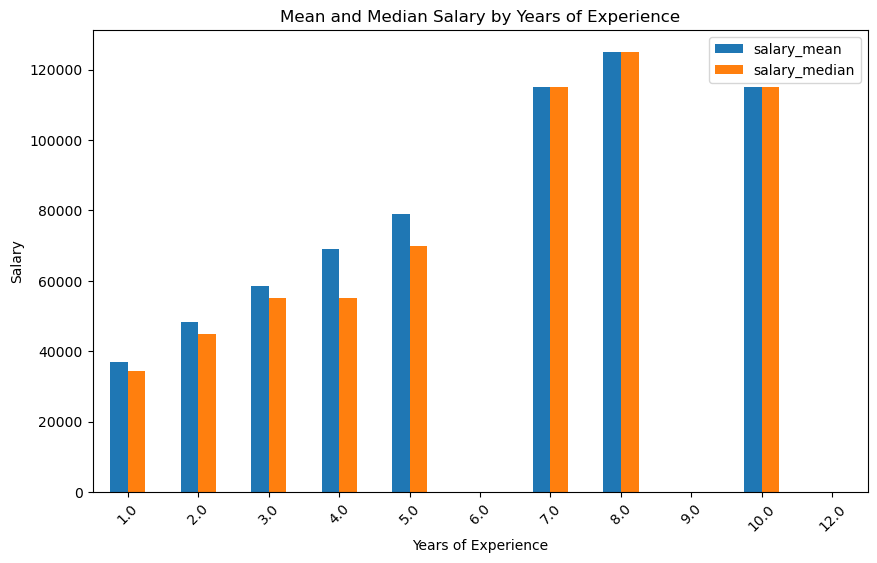

In [36]:
# Calculate mean and median salary by year of experience
salary_stats = df.groupby('experience_required')['mean_salary'].agg(salary_mean='mean', salary_median='median')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
salary_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
ax.set_title('Mean and Median Salary by Years of Experience')
plt.xticks(rotation=45)
plt.show()

### Insight:
    Our visualization clearly demonstrates a positive correlation between years of experience and salary for data analysts. As the years of experience increase, there is a noticeable upward trend in both the mean and median salaries. This implies that employers in the Philippines recognize the value and expertise that come with more years of experience in the field of data analysis.

## How do factors like job specialization, location, education, and specific skills affect a data analyst's salary?

### Mean Salary and Count for Each Job Specialization

In [37]:
# this record is not a data analyst role, lets exclude it
df = df[~df['job_specializations'].str.contains('Sales - Financial Services', case=False, na=False)]

In [38]:
# Create an empty list to store the data for each specialization
specializations = [
       'clerical/administrative support', 'healthcare',
       'practitioner/medical asst', 'e-commerce', 'admin/human resources',
       'oil/gas', 'banking/financial', 'tech & helpdesk support',
       'engineering', 'general/cost accounting', 'Mechanical',
       'accounting/finance', 'others', 'Audit & Taxation',
       'corporate finance/investment', 'Sales - Eng/Tech/IT',
       'customer service', 'services', 'sales/marketing', 'Electrical',
       'marketing/business dev', 'digital marketing', 'sales - corporate',
       'logistics/supply chain', 'it-network/sys/db admin',
       'computer/information technology', 'it-software', 'hotel/tourism',
       'hotel/restaurant', 'Call Center/IT-Enabled Services/BPO',
       'Pharmacy', 'Lawyer/Legal Asst', 'Merchandising',
       'Sales - Financial Services', 'IT-Hardware',
       'Building/Construction', 'Quantity Surveying',
       'Property/Real Estate', 'Science & Technology', 'Manufacturing',
       'Education/Training', 'Advertising', 'Education',
       'Actuarial/Statistics', 'Sciences', 'Arts/Media/Communications',
       'Government / Defence', 'Information Technology (Software)',
       'Purchasing/Material Mgmt', 'Production'
       ]

data_list = []

# Iterate over each specialization
for specialization in specializations:
    # Filter the DataFrame based on specialization
    filtered_df = df[df['job_specializations'].str.contains(specialization, case=False, na=False)]

    # Calculate the count and mean salary for the specialization category
    count = filtered_df.shape[0]
    mean_salary = filtered_df['mean_salary'].mean()

    # Append the data to the list
    data_list.append({'Specialization': specialization, 'Count': count, 'Mean Salary': mean_salary})

# Create a DataFrame from the list of dictionaries
data_df = pd.DataFrame(data_list)

# Sort the DataFrame by count in descending order
data_df = data_df.sort_values(by='Count', ascending=False)

# Exclude electrical since its under represented it might not reflect the true mean salary of those with electrical specialization.
data_df


C:\Users\engrn\AppData\Local\Temp\ipykernel_7816\59940449.py:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[df['job_specializations'].str.contains(specialization, case=False, na=False)]


,Specialization,Count,Mean Salary
25,computer/information technology,572,61495.123967
26,it-software,458,61773.963964
11,accounting/finance,226,38887.068966
24,it-network/sys/db admin,112,58400.000000
9,general/cost accounting,111,40670.333333
18,sales/marketing,106,55843.750000
6,banking/financial,89,34276.666667
17,services,71,50625.000000
20,marketing/business dev,56,66714.285714
4,admin/human resources,42,51000.000000


Insight: Employers primarily seek data analysts with specializations in computer/information technology, IT-software, accounting/finance, sales/marketing, and services.

Limitation:
Insufficient sample size in certain job specializations makes it unreliable to draw accurate conclusions about the mean salary. Generally, a minimum of 30 samples is considered sufficient for reliable estimates.

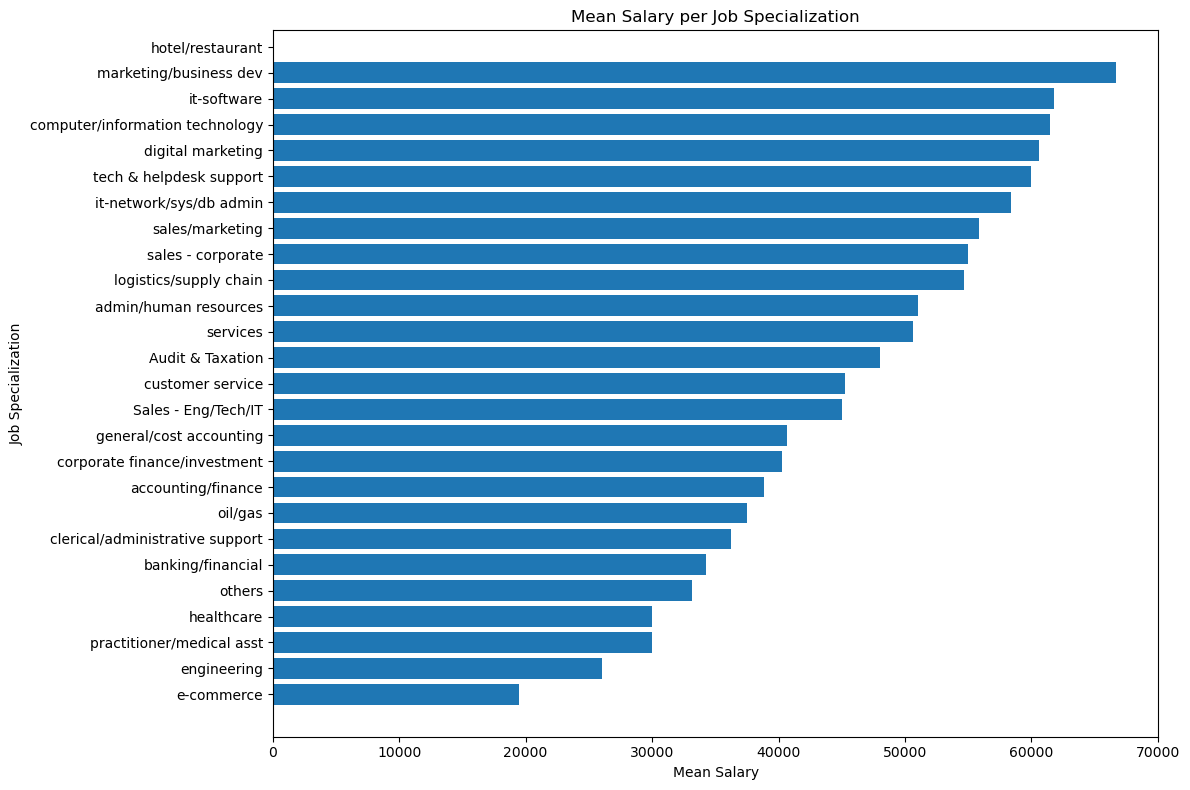

In [39]:
# Sort the DataFrame by mean salary in descending order
data_df = data_df.sort_values(by='Mean Salary', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(data_df['Specialization'], data_df['Mean Salary'])
plt.title('Mean Salary per Job Specialization')
plt.xlabel('Mean Salary')
plt.ylabel('Job Specialization')
plt.tight_layout()
plt.show()


#### Insight:

* Data analysts specializing in marketing/business dev have the highest mean salaries (~66,000PHP). IT and software-related specializations also offer high average salaries (~61,000PHP) and are the most in-demand. This combination of lucrative salaries and high demand makes these domains particularly attractive for data analysts.

#### Limitations:

* Limited data for certain specializations undermines the reliability of mean salary calculations. Specializations with counts below 10, such as "Sales - Eng/Tech/IT" and "corporate finance/investment," should be interpreted cautiously due to the small sample size. Fewer data points reduce the accuracy of estimating mean salaries. A minimum of 30 samples is generally recommended for reliable estimates.

## Mean Salary by Qualifications (Education)


In [40]:
# Create an empty list to store the data for each qualification
qualifications =[
                  "Professional License (Passed Board/Bar/Professional License Exam)",
                  "Post Graduate Diploma/Master's Degree",
                  "Bachelor's/College Degree",
                  "Vocational Diploma/Short Course Certificate",
                  'Not Specified',
                  'High School Diploma'
                ]   

data_list = []

# Iterate over each qualification
for qualification in qualifications:
    # Filter the DataFrame based on qualification
    filtered_df = df[df['qualification'].str.contains(qualification, case=False, na=False)]

    # Calculate the count and mean salary for the qualification category
    count = filtered_df.shape[0]
    mean_salary = filtered_df['mean_salary'].mean()

    # Append the data to the list
    data_list.append({'Qualification': qualification, 'Count': count, 'Mean Salary': mean_salary})

# Create a DataFrame from the list of dictionaries
qualification_df = pd.DataFrame(data_list)

# Sort the DataFrame by count in descending order
qualification_df = qualification_df.sort_values(by='Mean Salary', ascending=False)

qualification_df


C:\Users\engrn\AppData\Local\Temp\ipykernel_7816\1501041791.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[df['qualification'].str.contains(qualification, case=False, na=False)]


,Qualification,Count,Mean Salary
1,Post Graduate Diploma/Master's Degree,113,69114.285714
4,Not Specified,452,54405.614035
2,Bachelor's/College Degree,600,52116.729323
3,Vocational Diploma/Short Course Certificate,471,51983.281250
5,High School Diploma,4,23500.000000
0,Professional License (Passed Board/Bar/Profess...,0,NaN


#### Insight:
* Data analysts with higher educational qualifications, such as Post Graduate Diploma/Master's Degree, tend to earn higher salaries, while those with lower qualifications, like High School Diploma or Vocational Diploma/Short Course Certificate, earn lower salaries on average. Having at least a bachelor's degree or a Vocational Diploma/Short Course Certificate is often a preferred requirement for data analyst positions.

#### Limitations:
* The analysis may be limited by the small sample size of certain qualification, specifically High School Diploma. It is generally recommended to have at least 30 samples for reliable analysis.

## Mean Salary by Skills and High-Demand Skills

In [41]:
# Create an empty list to store the data for each qualification
skills = ['SQL', 'Python', 'R Programming', 'Tableau',
            'Power BI', 'Machine learning', 'Apache Spark',
            'Microsoft Excel', 'Hadoop', 'SAS', 'Google Sheet', 'MATLAB', 'Google Analytics',
            'cloud storage', 'Cloud Computing', 'NoSQL', 'ChatGPT', 'Google Bard', 'Microsoft Fabric']  

data_list = []

# Iterate over each qualification
for skill in skills:
    # Filter the DataFrame based on qualification
    filtered_df = df[df['skills_required'].str.contains(skill, case=False, na=False)]

    # Calculate the count and mean salary for the qualification category
    count = filtered_df.shape[0]
    mean_salary = filtered_df['mean_salary'].mean()

    # Append the data to the list
    data_list.append({'Skill': skill, 'Count': count, 'Mean Salary': mean_salary})

# Create a DataFrame from the list of dictionaries
skills_df = pd.DataFrame(data_list)

# Sort the DataFrame by count in descending order
skills_df = skills_df.sort_values(by='Count', ascending=False)

skills_df


,Skill,Count,Mean Salary
0,SQL,387,58292.452830
7,Microsoft Excel,370,45804.354839
4,Power BI,335,53633.333333
3,Tableau,215,58189.655172
1,Python,155,52630.434783
5,Machine learning,60,41000.000000
9,SAS,42,55000.000000
10,Google Sheet,37,53466.666667
12,Google Analytics,34,54666.666667
8,Hadoop,26,53000.000000


## Lets look at the salaries by Location

In [42]:
city_df = df.groupby('city')['mean_salary'].agg(salary_mean='mean', count='count').sort_values(by='count', ascending=False)
city_df

,salary_mean,count
city,,
taguig city,52310.480769,52
makati city,56248.292683,41
pasig city,55394.736842,19
quezon city,41902.500000,18
mandaluyong city,53250.000000,12
manila city,56500.000000,8
muntinlupa city,65800.000000,5
cebu city,47250.000000,4
paranaque city,62250.000000,2


In [43]:
province_df = df.groupby('province')['mean_salary'].agg(salary_mean='mean', count='count').sort_values(by='count', ascending=False)
province_df

,salary_mean,count
province,,
metro manila,53044.465409,159
cebu,46750.000000,8
pampanga,55000.000000,3
cavite,39500.000000,2
davao del sur,27250.000000,2
laguna,43250.000000,2
rizal,22500.000000,2
batangas,NaN,0
bulacan,NaN,0


In [44]:
region_df = df.groupby('region')['mean_salary'].agg(salary_mean='mean', count='count').sort_values(by='count', ascending=False)
region_df

,salary_mean,count
region,,
national capital region,53845.563063,222
central visayas,47262.222222,9
calabarzon,32785.714286,7
central luzon,57500.000000,6
davao region,27250.000000,2
soccsksargen,22500.000000,1
western visayas,27000.000000,1
bicol region,NaN,0
cagayan valley,NaN,0


### Based on reputable sources, the average salaries for data analysts in the Philippines are as follows:

    Jobstreet: 28,000 PHP to 38,000 PHP ($504 to $684) per month.
    ph.indeed.com: 27,521 PHP ($495) per month.
    Ph.talent.com: 35,000 PHP ($630) per month, with a minimum of 27,500 PHP ($495).

Now, let's check how many data analysts have salaries far below these averages, specifically salaries of 18,000 PHP and below.

In [45]:
# Get all the salaries 18000php and below

salary_below_18k = df[(df['min_salary'] <= 18000)]
salary_below_18k.reset_index()


,index,job_title,min_salary,max_salary,experience_required,skills_required,job_specializations,career_level,qualification,job_type,date_posted,city,province,region,mean_salary
0,73,Business Analyst,18000.0,30000.0,1.0,NaN,"Computer/Information Technology, IT-Software",1-4 Years Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-22,makati city,metro manila,national capital region,24000.0
1,117,Financial Analyst,15000.0,18000.0,NaN,NaN,NaN,Not Specified,Not Specified,NaN,2023-06-24,NaN,laguna,calabarzon,16500.0
2,252,Business Admin & Data Analyst,16000.0,22000.0,1.0,"Microsoft Excel, Power BI",NaN,1-4 Years Experienced Employee,Not Specified,Full-Time,2023-06-14,makati city,metro manila,national capital region,19000.0
3,298,Business Analyst,15000.0,21000.0,NaN,NaN,NaN,Less than 1 Year Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-18,makati city,metro manila,national capital region,18000.0
4,385,"Data Analyst - OPEN for Fresh IT, CS, IS Graduate",14000.0,15000.0,NaN,NaN,"Others, Others",Less than 1 Year Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-12,paranaque city,metro manila,national capital region,14500.0
5,470,Financial Analyst,18000.0,20000.0,2.0,NaN,NaN,1-4 Years Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-16,NaN,NaN,calabarzon,19000.0
6,518,DATA ANALYST,18000.0,20000.0,NaN,NaN,NaN,Not Specified,Not Specified,NaN,2023-06-08,mandaluyong city,metro manila,national capital region,19000.0
7,721,DATA ANALYST,15000.0,21000.0,1.0,NaN,"Engineering, Industrial Engineering",1-4 Years Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-04,NaN,NaN,national capital region,18000.0
8,787,Data Analyst,17000.0,22000.0,1.0,Microsoft Excel,"Sales/Marketing, E-commerce",1-4 Years Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-01,cebu city,cebu,central visayas,19500.0
9,834,Financial Analyst,15000.0,25000.0,1.0,NaN,"Accounting/Finance, General/Cost Accounting",1-4 Years Experienced Employee,Bachelor's/College Degree,Full-Time,2023-06-05,NaN,NaN,national capital region,20000.0


In [46]:
# Percentage of below 18000PHP monthly salaries
(salary_below_18k['job_title'].count() / df['job_title'].count()) * 100

1.1303191489361704

In [47]:
# Percentage of below 18000PHP monthly salaries (divide by count of jobs with specified salaries)
(salary_below_18k['job_title'].count() / df[df['mean_salary'].notna()]['mean_salary'].count()) * 100

6.827309236947792

In [48]:
# Percentage of job listings with salaries
(df[df['mean_salary'].notna()]['mean_salary'].count() / df['job_title'].count()) * 100

16.555851063829788

### Insights:
* Around 1.13% of job listings mention salary ranges, with the lowest starting at 18,000 PHP (approx. 324 USD) and going down to 13,000 PHP (approx. 234 USD) per month. However, it's crucial to note that only 16.56% of the jobs provide specific salary information, implying that there could be more lower salaries undisclosed in the job listings.
* The majority of data analyst jobs in the dataset are located in Metro Manila (NCR). It is safe to conclude that Metro Manila has a higher representation of data analyst positions compared to other Provinces.
* Based on the available data, the mean salary for data analysts in Metro Manila or NCR is estimated to be around 51,060 PHP.

### Limitation:
* it is important to note that the sample sizes for other locations are limited, which makes it challenging to draw accurate conclusions about the mean salary in those areas. For reliable estimates, it is recommended to have a minimum of 30 samples per location.

# Overall Insights:
* Salary Range: Data analysts in the Philippines earn an average monthly salary of 52,548 PHP ($963), ranging from 13,000 PHP to 152,000 PHP ($234 to $2740).
* Specializations: Data analysts specializing in computer/information technology, IT-software, accounting/finance, sales/marketing, and services have better job prospects and higher average salaries. The IT and software field offers abundant opportunities for data analysts.
* Education Impact: Higher qualifications, such as a Post Graduate Diploma or Master's Degree, correspond to higher salaries, while lower qualifications like High School Diploma or Vocational Diploma result in lower average salaries. Most positions require at least a bachelor's degree.
* Popular Skills: In the Philippines, the most in-demand skills for data analysts are Microsoft Excel, Power BI, SQL, Python, and Tableau. These skills are commonly sought after by employers in the field.
* Salary Statistics: Jobstreet reports a salary range of 28,000 PHP to 38,000 PHP ($504 to $684) per month, while ph.talent.com shows an average monthly salary of 35,000 PHP ($630), with a minimum of 27,500 PHP ($495).
* Concerns of Undervaluation: It is concerning to find job listings offering salaries as low as 13,000 PHP ($234) per month, falling below even entry-level expectations. This raises significant concerns about potential undervaluation within the industry, indicating compensation below industry standards. Furthermore, approximately 6.83%% of the job listings feature salary ranges that start from 18,000 PHP ($324) and can go as low as 13,000 PHP ($234), further highlighting the possibility of undervaluation in the field.
* Employer Perspective: Employers may post low-salary job listings expecting candidates to accept them due to a high supply of data analysts or job seekers in need. While this lowers their costs, it contributes to the undervaluation of data analysts and perpetuates a cycle of low compensation in the industry.
# Data Limitations:
* Limited Sample Sizes: The analysis could be influenced by small sample sizes for certain job specializations and qualifications. It is important to exercise caution when interpreting mean salary results, as the limited number of data points can lead to less accurate estimates.
* Challenges in Other Locations: Drawing conclusions about the mean salary in locations outside of Metro Manila and NCR is challenging due to limited sample sizes. For more reliable estimates, it is recommended to have a minimum of 30 data points per location.
* Limited Salary Specifications: Only 16.56% of the job listings provide specified salaries. This means many more lower salaries could be concealed within the job listings without salary details.